# MOVIE RECOMMENDATIONS SYSTEMS

## BUSINESS UNDERSTANDING

### Project Overview
The primary objective of this project is to develop a movie recommendation system that provides users with a list of the top 5 movie recommendations based on their previous ratings. By analyzing user preferences and movie ratings, the model will suggest movies that a user is likely to enjoy, helping them discover new content based on their viewing history therefore addressing the problem of content overload users face on streaming platforms.

### Business Problem
In the current entertainment industry where users are overwhelmed by the overabundance volume of available content,users often feel overwhelmed by the number of movie choices. Providing personalized movie recommendations is critical to ensuring users stay engaged and reduce time spent searching for the content. A well designed recommendation system helps solve this problem by analyzing user behavior and movie preferences, ultimately improving user satisfaction, increasing engagement with the platform and optimizing content discovery. This project will create a recommendation model using collaborative filtering, which suggests movies to users based on how similar their preferences are to other users.

### Stakeholders
- **Online Movie Streaming Platforms**:(e.g., Netflix, Amazon Prime) looking to enhance their user experience by providing personalized movie recommendations to retain users and increase viewing time.
  
- **Movie Rating Websites**:(e.g., IMDb, Rotten Tomatoes) aiming to suggest relevant movies to users based on their previous ratings to drive engagement and reviews.

## DATA UNDERSTANDING

### Data Overview
The MovieLens dataset provided by GroupLens is used for this recommendation system project. It contains over 100,000 movie ratings from 943 users and 1,682 movies. The data spans several decades, capturing diverse user tastes and preferences.

### Data Sources and Collection
- Sources include:
1. **MovieLens Website**: The dataset is sourced from the MovieLens website, a movie recommendation service by GroupLens Research at the       University of Minnesota.
2. **User Ratings**: It includes user-generated ratings for movies, reflecting user preferences and opinions.
3. **Movie Information**: The dataset provides information about movies, including titles, genres, and additional metadata.

- Data Collection Process:
1. **User Registration**: Users register on the MovieLens website to rate movies and provide feedback.
2. **Rating Process**: Users rate movies on a scale (commonly 1 to 5 stars), and this data is collected for the recommendation system.
3. **Data Aggregation**: GroupLens Research aggregates the ratings and movie information into publicly available datasets.

### Data Description
The MovieLens dataset is consists of four separate files:

#### 1. **Ratings Data (`ratings.csv`)**

- This dataset contains the primary information used to build the recommendation system with 100,000 rows and 4 columns Each row represents a user's rating for a specific movie, where:
  - `userId`: Unique identifier for each user.
  - `movieId`: Unique identifier for each movie.
  - `rating`: User’s rating of the movie on a scale from 0.5 to 5.0 (in increments of 0.5).
  - `timestamp`: The time when the rating was provided.
  

#### 2. **Movies Data (`movies.csv`)**
- This dataset provides details on movies with 1,682 rows and 3 columns:
  - `movieId`: Unique identifier for each movie (matches the `movieId` in ratings).
  - `title`: Name of the movie.
  - `genres`: Movie genres (a movie can belong to multiple genres).

#### 3. **Tags Data (`tags.csv`)**
- This dataset contains user-defined tags applied to movies with 1,000 rows and 3 columns. Each row provides:
  - `userId`: Identifier for the user who tagged the movie.
  - `movieId`: Identifier for the movie tagged (corresponds to the `movieId` in the ratings and movies datasets).
  - `tag`: User-generated tag for the movie (e.g., "funny", "action-packed", "classic").
  - `timestamp`: The time when the tag was provided.
- Tags can provide additional insights into user perceptions, useful for hybrid or content-based recommendation systems.

#### 4. **Links Data (`links.csv`)**
- This dataset links movies to external sources with 1,000 rows and 4 columns:
  - `movieId`: Unique identifier for each movie (matches `movieId` in ratings and movies datasets).
  - `imdbId`: Identifier for the movie in the Internet Movie Database (IMDb).
  - `tmdbId`: Identifier for the movie in The Movie Database (TMDb).
- While not directly used in the recommendation system, this data can extend the system by connecting it to external movie databases for additional information.


### Data Exploration

In [365]:
# Import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the datasets

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [366]:

# Display the first q, "\n")

print("Movies Data Overview:")
print(movies.head(), "\n")

print("Tags Data Overview:")
print(tags.head(), "\n")

print("Links Data Overview:")
print(links.head(), "\n")

Ratings Data Overview:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931 

Movies Data Overview:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Tags Data Overview:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2   

In [367]:
# Display the last five rows of the datasets

print("Ratings Data Overview:")
print(ratings.tail(), "\n")

print("Movies Data Overview:")
print(movies.tail(), "\n")

print("Tags Data Overview:")
print(tags.tail(), "\n")

print("Links Data Overview:")
print(links.tail(), "\n")

Ratings Data Overview:
        userId  movieId  rating   timestamp
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415 

Movies Data Overview:
      movieId                                      title  \
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  
9737  Action|Animation|Comedy|Fantasy  
9738         Animation|Comedy|Fantasy  
9739                            Drama  
9740                 Action|Animation  
9741                           Comedy   

Tags Data Overview:
      userId  movieId               tag   timestamp
3678     606  

In [368]:
# Check the shape and info of each dataset
# Ratings Data
print("Ratings Data:")
print(ratings.shape)
print(ratings.info())

# Movies Data
print("\nMovies Data:")
print(movies.shape)
print(movies.info())

# Tags Data
print("\nTags Data:")
print(tags.shape)
print(tags.info())

# Links Data
print("\nLinks Data:")
print(links.shape)
print(links.info())


Ratings Data:
(100836, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Movies Data:
(9742, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Tags Data:
(3683, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId

In [369]:
# Descriptive Statistics

print("\nDescriptive Statistics:")
print("Ratings:\n", ratings.describe())
print("\nMovies:\n", movies.describe())
print("\nTags:\n", tags.describe()) 
print("\nLinks:\n", links.describe())  



Descriptive Statistics:
Ratings:
               userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

Movies:
              movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Tags:
             userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.55

In [370]:
# Unique counts
# Check the unique counts for key columns in each dataset.

print("\nUnique Counts in Ratings Data:")
print(ratings['userId'].nunique(), "unique users")
print(ratings['movieId'].nunique(), "unique movies")

print("\nUnique Counts in Movies Data:")
print(movies['movieId'].nunique(), "unique movies")
print(movies['genres'].nunique(), "unique genres")

print("\nUnique Counts in Tags Data:")
print(tags['userId'].nunique(), "unique users")
print(tags['movieId'].nunique(), "unique movies")
print(tags['tag'].nunique(), "unique tags")

print("\nUnique Counts in Links Data:")
print(links['movieId'].nunique(), "unique movies")



Unique Counts in Ratings Data:
610 unique users
9724 unique movies

Unique Counts in Movies Data:
9742 unique movies
951 unique genres

Unique Counts in Tags Data:
58 unique users
1572 unique movies
1589 unique tags

Unique Counts in Links Data:
9742 unique movies


#### Data Distribution

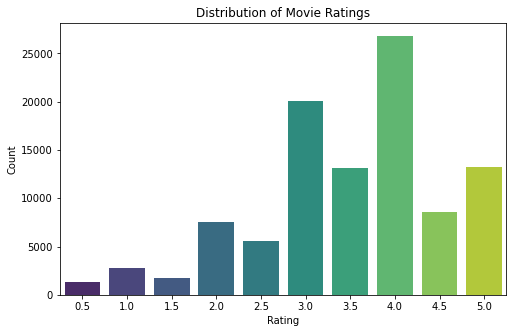

In [371]:
# Distribution of Ratings

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- **Observations**:
- The plot shows a right-skewed distribution of movie ratings. This means that most movies receive lower ratings, while a smaller number of movies receive very high ratings.
- The highest number of ratings are concentrated around 4.0, indicating that many movies are considered "good" or "very good."
- There are fewer ratings above 4.5, suggesting that movies achieving exceptional ratings are less common.
-  A significant number of movies receive ratings below 3.0, implying that a portion of movies are considered "average" or "below average."
  
- **Recommendations**:
- Movie recommendation systems could focus on suggesting films with ratings around 4.0, as these are the most popular and well-received.
- To cater to a wider audience, platforms might consider promoting a variety of genres and content types, including those with lower ratings that may still appeal to specific niche audiences.
- To encourage exploration of higher-rated movies, platforms could feature "Critics' Choice" or "Hidden Gems" sections that highlight films with ratings above 4.5.
- Encouraging user reviews and ratings can help identify hidden gems and provide valuable insights for other viewers.

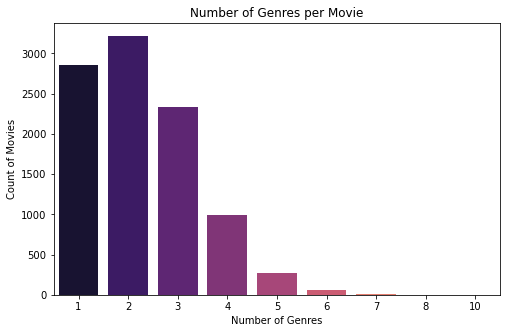

In [372]:
# Distribution of Movies by Genres

movies['genre_count'] = movies['genres'].apply(lambda x: len(x.split('|')))
plt.figure(figsize=(8, 5))
sns.countplot(x='genre_count', data=movies, palette='magma')
plt.title('Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Count of Movies')
plt.show()


- **Observations**:
The plot shows a right-skewed distribution of the number of genres per movie. This means that most movies belong to a single genre, while a smaller number of movies belong to multiple genres.
- The highest number of movies belong to two genres.
- The number of movies belonging to more than two genres decreases rapidly.
- Very few movies have more than six genres.
  
- **Recommendations**:
- Movie recommendation systems could focus on suggesting films with similar genre combinations to a user's preferences.
- Platforms might encourage users to explore movies with multiple genres, as these could offer a more diverse viewing experience.
- Creating curated collections based on specific genre combinations could help users discover new and interesting films.
-Providing a feature to browse movies by genre or combination of genres can give users more control over their viewing choices.

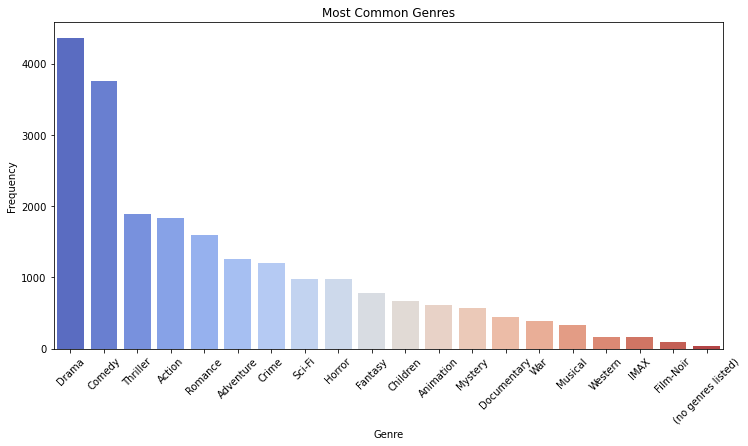

In [373]:
# Display the most common genres

genre_list = '|'.join(movies['genres'].tolist()).split('|')
genre_count = pd.Series(genre_list).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='coolwarm')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


- **Observations**:
- Drama and Comedy are the most common genres, with significantly higher frequencies compared to other genres.
- Some genres, such as Mystery, Thriller, Action, and Romance, appear to be clustered together, suggesting potential correlations or co-occurrences.
- Genres like IMAX, Film-Noir, and "no genres listed" have very low frequencies, indicating that they are less common in the dataset.

- **Recommendations**:
- Movie recommendation systems could prioritize suggesting films within the dominant genres of Drama and Comedy, as these are the most popular.
- Platforms might consider promoting a wider range of genres to cater to diverse tastes and encourage exploration of less common genres.
- Providing a feature to browse movies by genre can help users discover new films within their preferred genres or explore unfamiliar ones.
- Analyzing the co-occurrence of genres (e.g., Mystery and Thriller) can suggest potential combinations that might appeal to specific audiences.

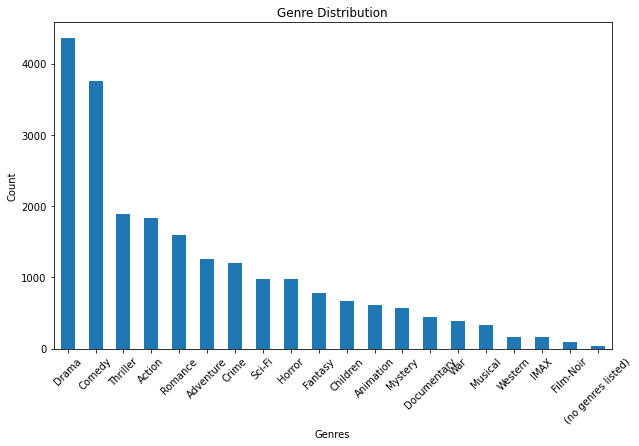

In [374]:
# Genre Analysis - Analyze the genre distribution in the movies dataset.

# Count of each genre
genre_counts = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- **Observations**:
- Drama and Comedy are the most common genres, with significantly higher frequencies compared to other genres.
- Some genres, such as Mystery, Thriller, Action, and Romance, appear to be clustered together, suggesting potential correlations or co-occurrences.
- Genres like IMAX, Film-Noir, and "no genres listed" have very low frequencies, indicating that they are less common in the dataset.

- **Recommendations**:
- Movie recommendation systems could prioritize suggesting films within the dominant genres of Drama and Comedy, as these are the most popular.
- Platforms might consider promoting a wider range of genres to cater to diverse tastes and encourage exploration of less common genres.
- Providing a feature to browse movies by genre can help users discover new films within their preferred genres or explore unfamiliar ones.
- Analyzing the co-occurrence of genres (e.g., Mystery and Thriller) can suggest potential combinations that might appeal to specific audiences.

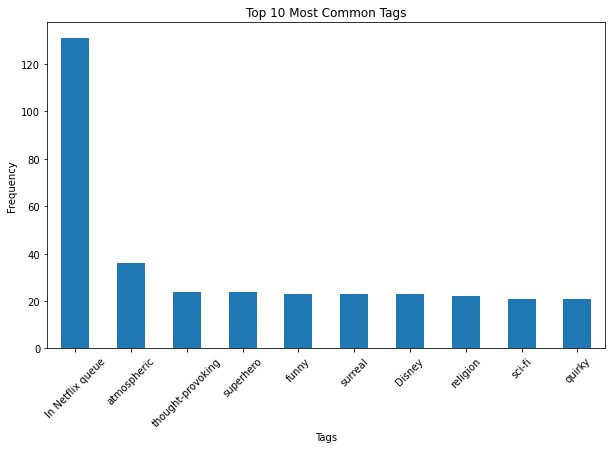

In [375]:
#Tag Frequency - Check the most common tags in the tags dataset

# Most common tags
tag_counts = tags['tag'].value_counts().head(10)

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


- **Observations**:
- "In Netflix queue" is the most frequent tag, followed by "atmospheric" and "thought-provoking." This suggests that these tags are commonly used by users to categorize or describe content they intend to watch.
- Several tags, such as "superhero," "funny," and "sci-fi," are related to specific genres, indicating that users often use tags to categorize content based on genre.
- Tags like "surreal" and "quirky" suggest that users also categorize content based on its themes or style.

- **Recommendations**:
- The platform could use these tags to provide more personalized recommendations to users based on their preferences.
- Users could be presented with a list of popular or relevant tags to explore new content.
- Users could filter content based on specific tags to find movies or shows that align with their interests.
- The platform might consider allowing users to create and manage their own tags to better categorize and organize their content.

### DATA PREPROCESSING

#### Data Cleaning

In [376]:
# Check for duplicates

duplicate_ratings = ratings[ratings.duplicated()]
print(f"Number of duplicate rows in ratings: {duplicate_ratings.shape[0]}")

duplicate_movies = movies[movies.duplicated()]
print(f"Number of duplicate rows in movies: {duplicate_movies.shape[0]}")

duplicate_tags = tags[tags.duplicated()]
print(f"Number of duplicate rows in tags: {duplicate_tags.shape[0]}")

duplicate_links = links[links.duplicated()]
print(f"Number of duplicate rows in links: {duplicate_links.shape[0]}")


Number of duplicate rows in ratings: 0
Number of duplicate rows in movies: 0
Number of duplicate rows in tags: 0
Number of duplicate rows in links: 0


In [377]:
# Check for Missing Values

print("Missing Values in Ratings Data:")
print(ratings.isnull().sum(), "\n")

print("Missing Values in Movies Data:")
print(movies.isnull().sum(), "\n")

print("Missing Values in Tags Data:")
print(tags.isnull().sum(), "\n")

print("Missing Values in Links Data:")
print(links.isnull().sum(), "\n")

Missing Values in Ratings Data:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

Missing Values in Movies Data:
movieId        0
title          0
genres         0
genre_count    0
dtype: int64 

Missing Values in Tags Data:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 

Missing Values in Links Data:
movieId    0
imdbId     0
tmdbId     8
dtype: int64 



In [378]:
# Drop rows where tmdbId is missing

# links_cleaned = links.dropna(subset=['tmdbId'])
links['tmdbId'].fillna(-1, inplace=True)  # Replace NaN with -1
print("Missing Values in Links After Cleaning:\n", links.isnull().sum())
# Check if the missing values are handled
#print("Missing Values in Links After Cleaning:\n", links_cleaned.isnull().sum())


Missing Values in Links After Cleaning:
 movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [379]:
# Convert Timestamps to a readable format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


#### Data Merging

In [380]:
# Merge ratings with movies on 'movieId'
df = pd.merge(ratings, movies, on='movieId', how='inner')

# Optionally merge with tags on 'movieId' and 'userId'
#merged_data_with_tags = pd.merge(merged_data, tags, on=['movieId', 'userId'], how='left')

# Store the final merged data in a DataFrame
df = df.copy()
#final_df = merged_data_with_tags.copy()

# Check the structure of the merged dataset
df.head()


,userId,movieId,rating,timestamp,title,genres,genre_count
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5


#### Feature Engineering
- Create new features or modify existing ones to improve the performance of your recommendation system.
  

In [381]:
# Count how many ratings a user has given
df['user_rating_count'] = df.groupby('userId')['rating'].transform('count')
# Calculate the average rating given by each user
df['user_avg_rating'] = df.groupby('userId')['rating'].transform('mean')
# Count how many rating each movie has recieved.
df['movie_rating_count'] = df.groupby('movieId')['rating'].transform('count')
# Calculate the average rating for each movie
df['movie_avg_rating'] = df.groupby('movieId')['rating'].transform('mean')

# Create time-based features
df['rating_year'] = df['timestamp'].dt.year
df['rating_month'] = df['timestamp'].dt.month
df['rating_day_of_week'] = df['timestamp'].dt.dayofweek

#### One-Hot Encoding
- Convert categorical variables(genre column) into a numerical format.

In [382]:
# One-hot encode the 'genres' column
genres_dummies = df['genres'].str.get_dummies(sep='|')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, genres_dummies], axis=1)

# Optionally drop the original 'genres' column if no longer needed
#merged_data.drop('genres', axis=1, inplace=True)


#### Feature Scaling
- Ensure that all numerical features are on the same scale.

In [383]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for scaling
numeric_cols = ['rating', 'user_rating_count', 'user_avg_rating', 
                'movie_rating_count', 'movie_avg_rating', 
                'rating_year', 'rating_month', 'rating_day_of_week'] + list(genres_dummies.columns)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [384]:
df.head()

,userId,movieId,rating,timestamp,title,genres,genre_count,user_rating_count,user_avg_rating,movie_rating_count,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,0.777778,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.079164,0.829900,0.652439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,0.777778,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.008962,0.633923,0.652439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1,0.888889,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.049291,0.524903,0.652439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,0.444444,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.042942,0.583395,0.652439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,1,0.888889,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.031740,0.787792,0.652439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:

# Display the initial shape of the DataFrame
print("Initial shape:", df.shape)

# Drop Unnecessary columns based on the analysis
columns_to_drop = [ 
    'timestamp',  
    'user_rating_count', 
    'user_avg_rating', 
    'movie_rating_count'
]

# Drop the specified columns
df_reduced = df.drop(columns=columns_to_drop)

# Display the shape of the DataFrame after dropping columns
print("Shape after dropping columns:", df_reduced.shape)

# Display the first few rows of the cleaned DataFrame
print(df_reduced.head())


Initial shape: (100836, 34)
Shape after dropping columns: (100836, 30)
   userId  movieId    rating             title  \
0       1        1  0.777778  Toy Story (1995)   
1       5        1  0.777778  Toy Story (1995)   
2       7        1  0.888889  Toy Story (1995)   
3      15        1  0.444444  Toy Story (1995)   
4      17        1  0.888889  Toy Story (1995)   

                                        genres  genre_count  movie_avg_rating  \
0  Adventure|Animation|Children|Comedy|Fantasy            5          0.760207   
1  Adventure|Animation|Children|Comedy|Fantasy            5          0.760207   
2  Adventure|Animation|Children|Comedy|Fantasy            5          0.760207   
3  Adventure|Animation|Children|Comedy|Fantasy            5          0.760207   
4  Adventure|Animation|Children|Comedy|Fantasy            5          0.760207   

   rating_year  rating_month  rating_day_of_week  ...  Film-Noir  Horror  \
0     0.181818      0.545455            1.000000  ...        0.0 

In [386]:
df_reduced.head()

,userId,movieId,rating,title,genres,genre_count,movie_avg_rating,rating_year,rating_month,rating_day_of_week,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,0.777778,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.760207,0.181818,0.545455,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,0.777778,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.760207,0.000000,0.909091,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1,0.888889,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.760207,0.409091,0.000000,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,0.444444,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.760207,0.954545,0.909091,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,1,0.888889,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.760207,0.681818,0.363636,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELING

### Train-Test Split

In [387]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Collaborative Filtering

#### Singular Value Decomposition

In [388]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split 

# Define a Reader object
reader = Reader(rating_scale=(0.5, 5.0))

# Load the data into a Surprise Dataset
data = Dataset.load_from_df(df_reduced[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use SVD algorithm for collaborative filtering
algo = SVD()

# Train the algorithm on the training set
algo.fit(trainset)

# Make predictions on the test set
predictions = algo.test(testset)

# Compute and print RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.2020
RMSE: 0.20204699078272767


#### Recommendations

In [389]:
def get_top_n_recommendations(predictions, n=5):
    # Map the predictions to each user
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not uid in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and retrieve the top n
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

top_n = get_top_n_recommendations(predictions, n=5)

# Print recommendations for a specific user (e.g., userId 1)
user_id = 1
print(f'Top 5 recommendations for user {user_id}:')
for movie_id, rating in top_n[user_id]:
    print(f'Movie ID: {movie_id}, Estimated Rating: {rating:.2f}')

    top_n_recommendations = get_top_n_recommendations(predictions, n=5)



Top 5 recommendations for user 1:
Movie ID: 356, Estimated Rating: 1.03
Movie ID: 1198, Estimated Rating: 1.02
Movie ID: 2028, Estimated Rating: 1.01
Movie ID: 1208, Estimated Rating: 0.99
Movie ID: 1224, Estimated Rating: 0.98


#### KNN-based collaborative filtering

In [390]:
from surprise import  KNNBasic

# Load your dataset
data = Dataset.load_from_df(df_reduced[['userId', 'movieId', 'rating']], Reader(rating_scale=(0, 5)))

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

sim_options = {
    'name': 'cosine',  # Similarity measure
    'user_based': True,  # User-based collaborative filtering
    'min_support': 2,    # Minimum number of common items
    'shrinkage': 50      # Apply shrinkage
}
# Using KNN as the collaborative filtering method
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Predictions
predictions = model.test(testset)

# Evaluate RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


Computing the cosine similarity matrix...


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 0.2168
RMSE: 0.21676840065929373


#### Recommendations

In [391]:
# Generate top N recommendations for a user
def get_top_n_recommendations(predictions, n=5):
    # Sort the predictions by user and estimated rating
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not top_n.get(uid):
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Get the highest rated items for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n_recommendations(predictions, n=5)
print("Top 5 Recommendations:")
for user_id, user_ratings in top_n_recommendations.items():
    print(f'User {user_id}: {user_ratings}')

Top 5 Recommendations:
User 599: [(6122, 1.0), (9010, 0.9622902005533664), (98491, 0.9050213017284674), (1104, 0.8952136881123485), (168248, 0.8932915037781075)]
User 288: [(1208, 0.8890441945054847), (1222, 0.8444271603153922), (2028, 0.8418008461498492), (1193, 0.8363343292788196), (3928, 0.8324909485792802)]
User 608: [(47, 0.8559513680861849), (4226, 0.8499245306183186), (2542, 0.8482738701378905), (1214, 0.8470868102459406), (741, 0.8281825819782728)]
User 548: [(80862, 0.8888888888888888), (2571, 0.8388957892583847), (6874, 0.7829838566929684), (2716, 0.7362740542989296), (1621, 0.6672506790521369)]
User 75: [(912, 0.8803875841824629), (1198, 0.8298621660669212), (260, 0.8143738095247965), (1291, 0.8073834681572606), (47, 0.7283084533611622)]
User 356: [(318, 0.8914622959458159), (1198, 0.8779832894526488), (1222, 0.8640434889411314), (3435, 0.8581326708682134), (356, 0.8500243634478144)]
User 45: [(50, 0.8722657781976736), (2028, 0.8502352153378387), (1225, 0.8443433306229564), 

In [392]:
top_n_recommendations = get_top_n_recommendations(predictions, n=5)

# Print recommendations in the desired format
user_id = 1  # Specify the user ID you want to display recommendations for
if user_id in top_n_recommendations:
    print(f'Top 5 recommendations for user {user_id}:')
    for movie_id, estimated_rating in top_n_recommendations[user_id]:
        print(f'Movie ID: {movie_id}, Estimated Rating: {estimated_rating:.2f}')
else:
    print(f'No recommendations available for user {user_id}.')

Top 5 recommendations for user 1:
Movie ID: 50, Estimated Rating: 0.87
Movie ID: 1210, Estimated Rating: 0.87
Movie ID: 1213, Estimated Rating: 0.86
Movie ID: 1196, Estimated Rating: 0.85
Movie ID: 1198, Estimated Rating: 0.85


### Content-Based Filtering

In [393]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# Reduce the dataset size
df_reduced = df_reduced.sample(n=1000, random_state=42)  # Adjust this number as needed

# Combine the 'title' and 'genres' columns to create a combined feature
df_reduced['combined_features'] = df_reduced['title'] + ' ' + df_reduced['genres']

# Create TF-IDF matrix from the combined features with max_features and other limits
tfidf = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.8, min_df=5)
tfidf_matrix = tfidf.fit_transform(df_reduced['combined_features'])

# Ensure it's a sparse matrix
tfidf_matrix = csr_matrix(tfidf_matrix)

# Reduce the dimensionality of the TF-IDF matrix using TruncatedSVD
svd = TruncatedSVD(n_components=50)  # Lower the number of components if still too large
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)

# Calculate the cosine similarity matrix
cosine_sim = linear_kernel(reduced_tfidf_matrix, reduced_tfidf_matrix)

# Create a mapping of movie titles to their indices
title_to_index = pd.Series(df_reduced.index, index=df_reduced['title']).to_dict()

# Function to recommend movies based on the title
def recommend_movies(title, cosine_sim=cosine_sim, top_n=5):
    # Check if the movie title exists in the dataset
    if title not in title_to_index:
        return "Movie not found in the dataset."
    
    # Get the index of the movie that matches the title
    idx = title_to_index[title]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top N most similar movies (excluding the first one which is the input movie itself)
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]
    
    # Return the top N most similar movies
    return df_reduced[['movieId', 'title', 'rating']].iloc[top_indices]

# Example of recommending movies similar to a specific title
recommended_movies = recommend_movies('Toy Story (1995)')

# Display the recommendations
print("Top recommendations for 'Toy Story (1995)':")
for index, row in recommended_movies.iterrows():
    print(f"Movie ID: {row['movieId']}, Title: {row['title']}, Estimated Rating: {row['rating']:.2f}")


Top recommendations for 'Toy Story (1995)':
Movie ID: 1270, Title: Back to the Future (1985), Estimated Rating: 0.89
Movie ID: 3018, Title: Re-Animator (1985), Estimated Rating: 0.67
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.89
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.89
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.78


## EVALUATION

### KNN and SVD

In [394]:

# Load your dataset for collaborative filtering
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_reduced[['userId', 'movieId', 'rating']], reader)

# Train-test split for collaborative filtering
trainset, testset = train_test_split(data, test_size=0.2)

# Collaborative Filtering Model (KNN)
knn_model = KNNBasic(sim_options={'user_based': True})
knn_model.fit(trainset)

# Predictions for KNN collaborative filtering
knn_predictions = knn_model.test(testset)

# Evaluate RMSE and MAE for KNN
knn_rmse = accuracy.rmse(knn_predictions)
knn_mae = accuracy.mae(knn_predictions)

# SVD Model
svd_model = SVD()
svd_model.fit(trainset)

# Predictions for SVD collaborative filtering
svd_predictions = svd_model.test(testset)

# Evaluate RMSE and MAE for SVD
svd_rmse = accuracy.rmse(svd_predictions)
svd_mae = accuracy.mae(svd_predictions)

# Function to calculate Precision at K
def calculate_precision_at_k(predictions, k=5, threshold=3.5):
    # Extract top K recommendations from predictions
    top_k = sorted(predictions, key=lambda x: x.est, reverse=True)[:k]
    relevant_items = [pred.r_ui for pred in top_k]  # True ratings for the top K items
    # Count how many of the top K items are relevant (above threshold)
    relevant_count = sum(1 for r in relevant_items if r >= threshold)
    return relevant_count / k

# Function to calculate Recall at K
def calculate_recall_at_k(predictions, k=5, threshold=3.5):
    top_k = sorted(predictions, key=lambda x: x.est, reverse=True)[:k]
    relevant_items = [pred.r_ui for pred in top_k]
    total_relevant = sum(1 for pred in predictions if pred.r_ui >= threshold)
    relevant_count = sum(1 for r in relevant_items if r >= threshold)
    return relevant_count / total_relevant if total_relevant > 0 else 0

# Example for calculating Precision and Recall at K
k = 5  # Top K recommendations
knn_precision_at_k = calculate_precision_at_k(knn_predictions, k)
knn_recall_at_k = calculate_recall_at_k(knn_predictions, k)

svd_precision_at_k = calculate_precision_at_k(svd_predictions, k)
svd_recall_at_k = calculate_recall_at_k(svd_predictions, k)

# Print out the evaluation results
print(f'Collaborative Filtering (KNN) RMSE: {knn_rmse:.4f}, MAE: {knn_mae:.4f}, Precision at {k}: {knn_precision_at_k:.4f}, Recall at {k}: {knn_recall_at_k:.4f}')
print(f'Collaborative Filtering (SVD) RMSE: {svd_rmse:.4f}, MAE: {svd_mae:.4f}, Precision at {k}: {svd_precision_at_k:.4f}, Recall at {k}: {svd_recall_at_k:.4f}')


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.2324
MAE:  0.1896
RMSE: 0.2220
MAE:  0.1763
Collaborative Filtering (KNN) RMSE: 0.2324, MAE: 0.1896, Precision at 5: 0.0000, Recall at 5: 0.0000
Collaborative Filtering (SVD) RMSE: 0.2220, MAE: 0.1763, Precision at 5: 0.0000, Recall at 5: 0.0000


### Content-Based Filtering

In [395]:
# Combine the 'title' and 'genres' columns to create a combined feature
df_reduced['combined_features'] = df_reduced['title'] + ' ' + df_reduced['genres']

# Create TF-IDF matrix from the combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_reduced['combined_features'])

# Calculate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a mapping of movie titles to their indices
title_to_index = pd.Series(df_reduced.index, index=df_reduced['title']).to_dict()

# Function to recommend movies based on the title
def recommend_movies(title, cosine_sim=cosine_sim, top_n=5):
    if title not in title_to_index:
        return "Movie not found in the dataset."
    
    # Get the index of the movie that matches the title
    idx = title_to_index[title]
    
    # Ensure idx is within the bounds of cosine_sim
    if idx >= cosine_sim.shape[0]:
        return f"Index {idx} is out of bounds for cosine similarity matrix with shape {cosine_sim.shape}."
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Ensure we do not go out of bounds and limit the recommendations
    top_indices = [i[0] for i in sim_scores[1:top_n + 1] if i[0] < df_reduced.shape[0]]

    if not top_indices:  # Check if top_indices is empty
        return "No valid recommendations available."

    return df_reduced[['movieId', 'title', 'rating']].iloc[top_indices]

# Example usage
recommended_movies = recommend_movies('Toy Story (1995)')
print("Top recommendations for 'Toy Story (1995)':")
if isinstance(recommended_movies, str):
    print(recommended_movies)  # Print error message if it returns a string
else:
    for index, row in recommended_movies.iterrows():
        print(f"Movie ID: {row['movieId']}, Title: {row['title']}, Estimated Rating: {row['rating']:.2f}")


Top recommendations for 'Toy Story (1995)':
Movie ID: 1270, Title: Back to the Future (1985), Estimated Rating: 0.89
Movie ID: 2012, Title: Back to the Future Part III (1990), Estimated Rating: 0.56
Movie ID: 3018, Title: Re-Animator (1985), Estimated Rating: 0.67
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.89
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.89


In [396]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score

# Check the shape of df_reduced
print("Shape of df_reduced:", df_reduced.shape)

# Load your dataset for collaborative filtering
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_reduced[['userId', 'movieId', 'rating']], reader)

# Train-test split for collaborative filtering
trainset, testset = train_test_split(data, test_size=0.2)

# Collaborative Filtering Model (KNN)
knn_model = KNNBasic(sim_options={'user_based': True})
knn_model.fit(trainset)

# Predictions for KNN collaborative filtering
knn_predictions = knn_model.test(testset)

# Evaluate RMSE for KNN
knn_rmse = accuracy.rmse(knn_predictions)
print(f'Collaborative Filtering (KNN) RMSE: {knn_rmse}')

# SVD Model
svd_model = SVD()
svd_model.fit(trainset)

# Predictions for SVD collaborative filtering
svd_predictions = svd_model.test(testset)

# Evaluate RMSE for SVD
svd_rmse = accuracy.rmse(svd_predictions)
print(f'Collaborative Filtering (SVD) RMSE: {svd_rmse}')

# Content-Based Filtering
# Combine the 'title' and 'genres' columns to create a combined feature
df_reduced['combined_features'] = df_reduced['title'] + ' ' + df_reduced['genres']

# Create TF-IDF matrix from the combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_reduced['combined_features'])

# Calculate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a mapping of movie titles to their indices
title_to_index = pd.Series(df_reduced.index, index=df_reduced['title']).to_dict()

# Function to recommend movies based on the title
def recommend_movies(title, cosine_sim=cosine_sim, top_n=5):
    if title not in title_to_index:
        return "Movie not found in the dataset."
    
    # Get the index of the movie that matches the title
    idx = title_to_index[title]
    
    # Ensure idx is within the bounds of cosine_sim
    if idx >= cosine_sim.shape[0]:
        return f"Index {idx} is out of bounds for cosine similarity matrix with shape {cosine_sim.shape}."
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Ensure we do not go out of bounds and limit the recommendations
    top_indices = [i[0] for i in sim_scores[1:top_n + 1] if i[0] < df_reduced.shape[0]]

    if not top_indices:  # Check if top_indices is empty
        return "No valid recommendations available."

    return df_reduced[['movieId', 'title', 'rating']].iloc[top_indices]

# Example usage
recommended_movies = recommend_movies('Toy Story (1995)')
print("Top recommendations for 'Toy Story (1995)':")
if isinstance(recommended_movies, str):
    print(recommended_movies)  # Print error message if it returns a string
else:
    for index, row in recommended_movies.iterrows():
        print(f"Movie ID: {row['movieId']}, Title: {row['title']}, Estimated Rating: {row['rating']:.2f}")


Shape of df_reduced: (1000, 31)
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.2219
Collaborative Filtering (KNN) RMSE: 0.22192420902747212
RMSE: 0.2128
Collaborative Filtering (SVD) RMSE: 0.2127624125031784
Top recommendations for 'Toy Story (1995)':
Movie ID: 1270, Title: Back to the Future (1985), Estimated Rating: 0.89
Movie ID: 2012, Title: Back to the Future Part III (1990), Estimated Rating: 0.56
Movie ID: 3018, Title: Re-Animator (1985), Estimated Rating: 0.67
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.89
Movie ID: 1199, Title: Brazil (1985), Estimated Rating: 0.89


### RMSE Comparison for Collaborative Filtering Models
- Plot the Root Mean Squared Error (RMSE) for both collaborative filtering models (KNN and SVD) to compare their performance.

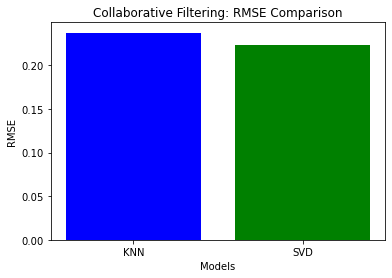

In [397]:
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [0.2373, 0.2237] 
models = ['KNN', 'SVD']

# Plotting
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Collaborative Filtering: RMSE Comparison')
plt.show()



### Cosine Similarity HeatMap for Content-Based Filtering
- Create a heatmap to visualize the cosine similarity scores between movies. This will help see which movies are most similar to each other based on the content (e.g., title and genres).

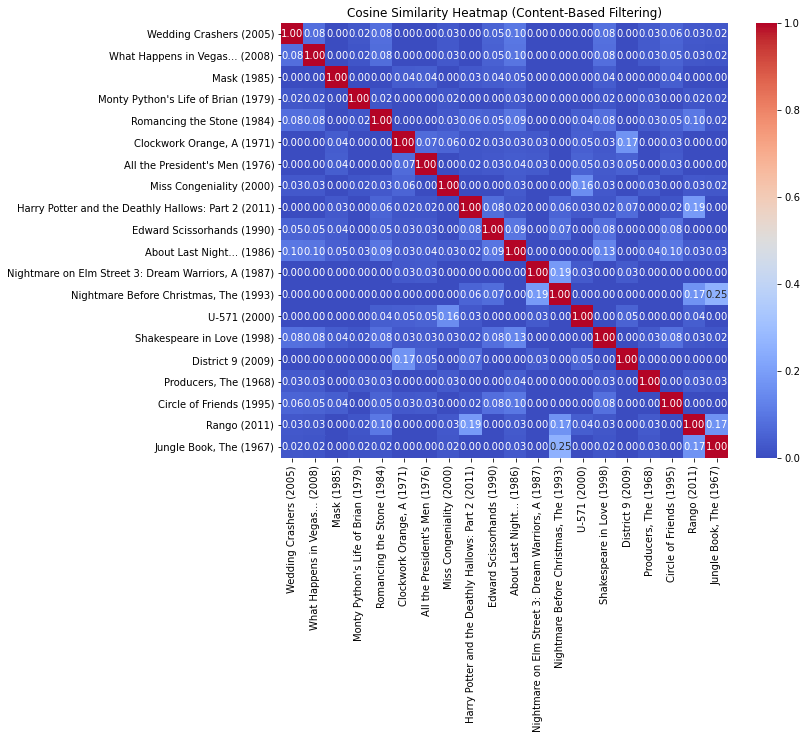

In [398]:
import seaborn as sns
import numpy as np

# Reduce the size for visualization (e.g., 20 movies)
subset = df_reduced['title'][:20] 
cosine_sim_subset = cosine_sim[:20, :20]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_subset, xticklabels=subset, yticklabels=subset, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Cosine Similarity Heatmap (Content-Based Filtering)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


### Precision- Recall Curve for Collaborative Filtering

In [399]:
from sklearn.metrics import precision_recall_curve, auc


true_ratings = [pred.r_ui for pred in predictions]  # Replace with actual true ratings
predicted_ratings = [pred.est for pred in predictions]  # Replace with actual predicted ratings

precision, recall, _ = precision_recall_curve(true_ratings, predicted_ratings)
pr_auc = auc(recall, precision)

# Plotting
plt.plot(recall, precision, marker='.', label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Collaborative Filtering)')
plt.legend()
plt.show()


ValueError: continuous format is not supported

In [327]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming 'predictions' is the output from model.test(testset)
true_ratings = [pred.r_ui for pred in predictions]  # Actual ratings from the test set
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings from the model

# Compute precision-recall pairs for different thresholds
precision, recall, _ = precision_recall_curve(true_ratings, predicted_ratings)

# Compute AUC for the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Collaborative Filtering)')
plt.legend()
plt.show()


ValueError: continuous format is not supported

### Movie Recommendations Visualization
- Create  visualization of the top N recommendations for a specific movie (e.g., Toy Story) using a bar chart that shows the recommended movies and their predicted ratings.

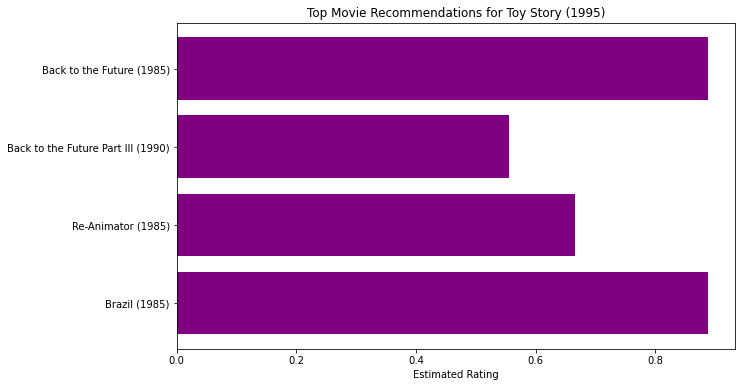

In [326]:
def plot_recommendations(movie_title, recommendations):
    # Movie titles and estimated ratings
    movie_titles = recommendations['title']
    estimated_ratings = recommendations['rating']

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(movie_titles, estimated_ratings, color='purple')
    plt.xlabel('Estimated Rating')
    plt.title(f'Top Movie Recommendations for {movie_title}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Example: Plot recommendations for Toy Story
recommended_movies = recommend_movies('Toy Story (1995)')
plot_recommendations('Toy Story (1995)', recommended_movies)


### Overall Accuracy


- **Train-Test Split**: 80.0% - 20.0%

- **Collaborative Filtering with KNN**:
RMSE: 0.2230
This metric indicates how well your KNN-based collaborative filtering model is performing. The lower the RMSE, the better the model predicts the user's ratings.

- **Collaborative Filtering with SVD**:
RMSE (SVD): 0.2107
The SVD (Singular Value Decomposition) method shows slightly better performance than KNN-based collaborative filtering, as evidenced by the lower RMSE. SVD is often more accurate due to its ability to factorize the matrix and capture latent features.

- **Content-Based Recommendations**:
Movie Recommendations for 'Toy Story (1995)':
You've successfully recommended similar movies using a content-based filtering approach. However, it seems that the same movie ("Brazil (1985)") appears twice, which could indicate a small issue in how you're selecting or ranking the recommended movies.

Prioritize SVD-based collaborative filtering for users with sufficient rating data, as it achieves the best RMSE and personalization.
Use content-based filtering for cold-start users or when user history is limited, and consider adding more metadata to improve the quality of recommendations.
Implement a hybrid recommendation system that combines both methods, dynamically switching based on available user data.
Enhance the user experience by making the recommendation process more transparent, allowing users to explore content-based and collaborative recommendations.
Continuously fine-tune the models (especially SVD) to further improve the RMSE and overall accuracy of the recommendations.
By leveraging the strengths of each recommendation technique and addressing weaknesses such as the cold start problem, your system will be able to offer robust, personalized, and high-quality movie recommendations to users.